# Numeriske metoder

1. Diskretisering, numeriske partielle deriverte og Poissonligning, 1d
2. Varmeligning, (1+1)d
3. Bevaringslover og transportligning, (1+1)d

Nå skal vi se på numeriske løsninger. Vi begynner med en innføring i hva og hvordan numeriske løsninger vil være, og diskutere numeriske evaluering av de partielle deriverte, som er grunnsteinen alle våre metoder baserer seg på.

## 1. Innføring

Uten et slags formel, trenger vi uendelig mye data til å beskrive en funskjon fra $\mathbb{R}\rightarrow\mathbb{R}$.

Likevel er vi langt på vei hvis vi vet en endelig mengde med verdier $(x_i, f(x_i))$.

### Eksempel 1: vi tegner en graf

Ta en titt på koden under, og hva som skjer når vi tegner grafen til $f(x)=\sin(\pi x)$. For å lage grafen har vi altså ikke brukt noe kunnskap utenom de 100 verdiene $\sin(x_i)$.

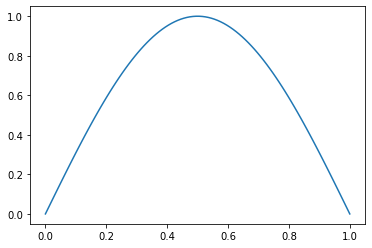

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# lag 100 punkter mellom 0 og 1
x = np.linspace(0,1,100)

# beregn f(x) på alle punktene
f = np.sin(np.pi * x)

# lager en plott fra de 100 parene (x,f(x))
plt.plot(x,f)

### Eksempel 2: vi plotter en overflate i 3d
   
På det samme måte, om vi har en funksjon $\mathbb{R}^2\rightarrow\mathbb{R}$ av to variabler, er det ofte nok å ha en mengde med verdier $\big(x_j, y_i, f(x_j, y_i)\big)$.   

*Hvorfor kommer $j$ før $i$? Se diskusjon som kommer etter kodefeltet/plottet*

Når vi plotter funksjoner for eksempel, lager vi et rutenett av punkter $(x_j, y_i)$ og beregner funksjonsverdiene $f(x_j, y_i)$. Ingen annen informasjon brukes:

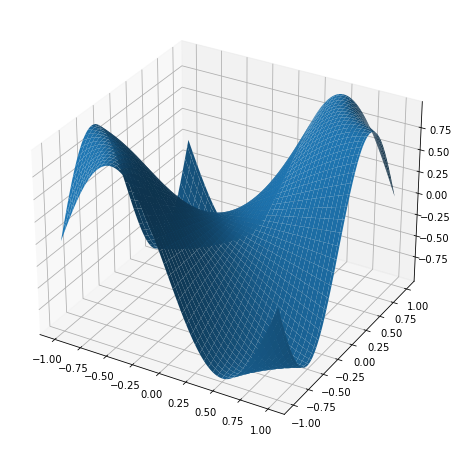

In [2]:
# lager 100 punkter mellom -1 og 1
x = np.linspace(-1,1,100)
# lager 100 punkter mellom -1 og 1
y = np.linspace(-1,1,100)

# lager et rutenett med 100x100 = 10.000 punkter
X, Y = np.meshgrid(x,y)

# finn sin(pi*x*y) på disse 10.000 punktene
Z = np.sin(np.pi * X * Y)

fig,ax2 = plt.subplots(subplot_kw ={"projection":"3d"}, figsize=(10,8))

# plotter de 10.000 funksjonsverdiene
ax2.plot_surface(X, Y, Z)

plt.show()

### Advarsel: arrayer, rutenett, og meshgrid

Du lurte kanskje på hvorfor vi pratet om $f(x_j,y_i)$, og ikke $f(x_i,y_j)$?

Tradisjon tro, når vi skriver matriser kommer radene først, dvs tallet $A[i,j]$ er rad $i$ og kolonne $j$. 

Men, når vi skal tegne en funksjon $f(x,y)$ er det vanligere å ta $x$-aksen horisontalt og $y$-aksen vertikalt. Det mest naturlig rutenett har altså $x$ tilsvarende kolonner, og $y$ tilsvarende rader. Vi setter altså opp

$$
F[i,j] = f(x_j, y_i)
$$

Numpy sin meshgrid funksjon lager som default sitt rutenett $X[i,j], Y[i,j]$ slik at $X[i,j]=x[j]$ og $Y[i,j]=y[j]$. Resultatet er at $F = F(X,Y)$ gir arrayen over.

Det er imidlertidig mulig å overstyre slik at man får heller $F[i,j]=f(x_i,y_j)$ hvis man foretrekker. Eksperiment med kodefeltet under.

In [3]:
# lager 5 punkter mellom -1 og 0
x = np.linspace(-1,0,5)
# lager 5 punkter mellom 0 og 1
y = np.linspace(0,1,5)

# lager et rutenett med 5x5 = 25 punkter
X1, Y1 = np.meshgrid(x,y)

# lager samme rutenett, motsett rekkefølge
X2, Y2 = np.meshgrid(x,y,indexing='ij')

# print ut X-verdiene i den vanlige - de følger den vanlige x-aksen
print(X1)

# hvis du printer ut X-verdiene for den andre muligheten, vil det trolig gå mot forventningene dine
# print(X2)

[[-1.   -0.75 -0.5  -0.25  0.  ]
 [-1.   -0.75 -0.5  -0.25  0.  ]
 [-1.   -0.75 -0.5  -0.25  0.  ]
 [-1.   -0.75 -0.5  -0.25  0.  ]
 [-1.   -0.75 -0.5  -0.25  0.  ]]


## 2. Diskretisering og de partielle deriverte

Hva med de partielle deriverte? Hvordan skal vi finne de om vi bare vet funksjonsverdier $f(x_j, y_i)$?

### a) Repetisjon: Numerisk derivasjon

Husk fra ProgNumSikk at om vi har en funksjon $f(x)$ av en variabel, finnes det tre naturlige måter å tilnærme den deriverte $f'(x)$:

1. Forlengs differanser

$$
f'(x) \approx \frac{f(x+h)-f(x)}{h}
$$


2. Baklengs differanser

$$
f'(x) \approx \frac{f(x)-f(x-h)}{h}
$$

3. Sentrale differanser
$$
f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}
$$

Det er ingen hindring i å bruke disse formlene om vi kun vet funksjonsverdiene på enkelte punkter $f(x_i)$. Det vi gjør er å ta $h$ til å være minst avstand mellom tilstøtende punkter, dvs:

1. Forlengs differanser

$$
f'(x_i) \approx \frac{f(x_{i+1})-f(x_i)}{h}
$$


2. Baklengs differanser

$$
f'(x_i) \approx \frac{f(x_i)-f(x_{i-1})}{h}
$$

3. Sentrale differanser
$$
f'(x_i) \approx \frac{f(x_{i+1})-f(x_{i-1})}{2h}
$$

Vi har antatt at avstand $h$ mellom punktet $x_i$ og naboene sine, $x_{i-1}$ og $x_{i+1}$, er det samme. Vi viser hvordan det funker under.

**Oppgave** Hvilken metode har vi tatt i bruk? Kan du endre koden til å kjøre en av de andre?

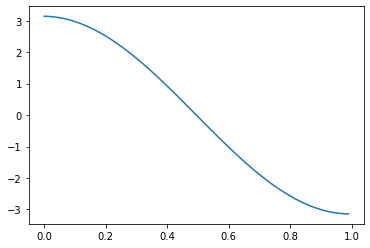

In [4]:
# lag 100 punkter mellom 0 og 1
x = np.linspace(0,1,100)

# beregn f(x) på alle punktene
f = np.sin(np.pi * x)

# beregn en vektor df hvor df[i] = f[i+1]-f[i]
df = np.diff(f)

# beregn en vektor dx hvor dx[i] = x[i+1] - x[i]
# her kommer alle elementene til å være h
# men den koden funker selv om vi velger punktene i x med forskjellige avstander fra hverandre
dx = np.diff(x)

# lager den deriverte, en vektor g[i] = df[i]/dx[i]
g = df / dx

# lager en plott fra de 99 parene (x,f'(x))
# x[0:-1] velger ut alle punkter i x unntatt den aller siste

# vi har kun 99 punkter siden np.diff(f) må stoppe df[i] = f[i+1] - f[i] ved i=98, den nest siste verdien
# ellers ville ikke f[i+1] gitt mening om vi satt inn i=99

plt.plot(x[0:-1],g)

### b) Numerisk partiell derivasjon

Når det kommer til partielle derivasjon, funker det som over, bare at vi nå har et rutenett med punkter $(x_j,y_i)$.

La $h$ være avstanden mellom punktene i $x$-retning. Vi har også for $f_x$

1. Forlengs differanser

$$
f_x(x_j,y_i) \approx \frac{f(x_{j+1},y_i)-f(x_j,y_i)}{h}
$$


2. Baklengs differanser

$$
f_x(x_j, y_i) \approx \frac{f(x_j,y_i)-f(x_{j-1},y_i)}{h}
$$

3. Sentrale differanser
$$
f_x(x_j, y_i) \approx \frac{f(x_{j+1},y_i)-f(x_{j-1},y_i)}{2h}
$$


La nå $k$ være avstanden mellom punktene i $y$-retning. For $f_y$ får vi

1. Forlengs differanser

$$
f_y(x_j,y_i) \approx \frac{f(x_j,y_{i+1})-f(x_j,y_i)}{k}
$$


2. Baklengs differanser

$$
f_y(x_j,y_i) \approx \frac{f(x_j,y_{i})-f(x_j,y_{i-1})}{k}
$$

3. Sentrale differanser

$$
f_y(x_j,y_i) \approx \frac{f(x_j,y_{i+1})-f(x_j,y_{i-1})}{2k}
$$

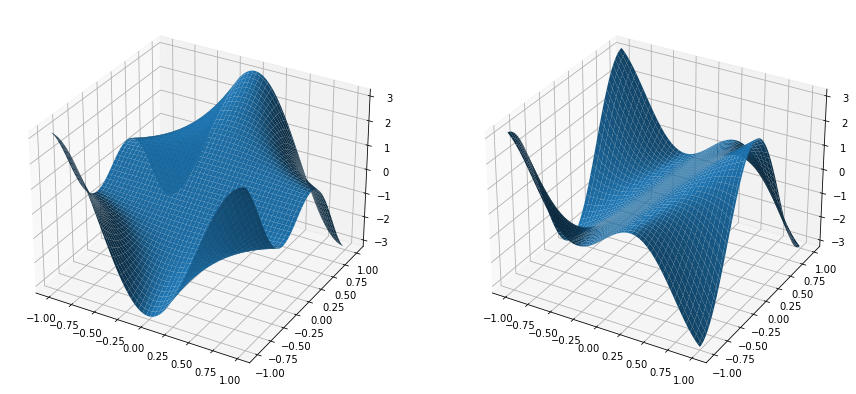

In [5]:
# Plotter de partielle deriverte av en funksjon

# lager 100 punkter mellom -1 og 1
x = np.linspace(-1,1,100)
# lager 100 punkter mellom -1 og 1
y = np.linspace(-1,1,100)

# lager et rutenett med 100x100 = 10.000 punkter
X, Y = np.meshgrid(x,y)

# finn sin(pi*x*y) på disse 10.000 punktene
Z = np.sin(np.pi * X * Y)

# tar differansene langs x-aksen, dZx[i,j] = Z[i,j+1] - Z[i,j]
# j-koordinat tilsvarer x, se kommentaren  "Advarsel: Arrayer, rutenett og meshgrid"

dZx = np.diff(Z, axis=1)

# tar differansen dX[i,j] = X[i,j+1]-X[i,j]
dX = np.diff(X, axis=1)

# beregner den deriverte
# kan erstatte dX med h hvis avstanden mellom punktene i x er konstant, slik de er her
Zx = dZx / dX

# tar differansene langs y-aksen, dZy[i,j] = Z[i+1,j] - Z[i,j]
# i-koordinat tilsvarer y, se kommentaren  "Advarsel: Arrayer, rutenett og meshgrid"

dZy = np.diff(Z, axis=0)

dY = np.diff(Y, axis=0)

Zy = dZy / dY

fig,(ax1, ax2) = plt.subplots(1,2,subplot_kw ={"projection":"3d"}, figsize=(15,10))

# plotter f_x til venstre
# må bruke X[:,0:-1] og tilsvarende på Y siden vi mistet en x-verdi da vi brukte np.diff

ax1.plot_surface(X[:,0:-1], Y[:,0:-1], Zx)

# plotter f_y til høyre
# må bruke X[0:-1,:] og tilsvarende på Y siden vi mistet en y-verdi da vi brukte np.diff

ax2.plot_surface(X[0:-1,:], Y[0:-1,:], Zy)

plt.show()

## 3. Diskretisering av differensialligninger

Differensialligninger løses i hovedsak ved å redusere dem til et system av ligninger med et endelig antall variabler. Denne prosessen kalles for **diskretisering**.

Vi er mest opptatt av tre ligninger: Poissonligning, varmeligning, og bevaringslover. Som vi skal se er de først to nært beslektet.



### a) Poissonligning

Poissonligning er **lineær**. Diskretisering av et lineært PDE vil typisk føre til et lineært system, slik vi har sett i matte 1. 

Etter diskretisering blir Poissons ligning
$$
-L\vec{u} = \vec{F}
$$

hvor $L$ er en matrise og $\vec{F}$ en vektor, og den ukjente vi ønsker å finne er $\vec{u}$. Randbetingelsene vil påvirke verdien til både $L$ og $\vec{F}$. Vi vil begynne med Poissonligning i 1 dimensjon, dvs ODEen

$$
u_{xx} = f(x),\quad a<x<b
$$

med enter Dirichlet eller Neumann randbetingelser, dvs vi oppgir enten $u(x)$ (Dirichlet) eller $u'(x)$ (Neumann) ved $x=a$ og $x=b$.

### b) Varmeligning

Det er lettest å løse varmeligningen ved å tilnærme den med den ordinære differensialligning
$$
\frac{du}{dt} = Lu + f,
$$
hvor $L$ og $f$ er nøyaktig som i Poissons ligning. Du kan tenke deg at

"Varmeligning = Poissonligning + Eulers metode"

Hovedparten av innsats i programmering av løsning av varmeligning blir å sette opp $L$ og $f$ som i Poissons ligning. Vi diskuterer videre i 6_2 (1 dimensjon i rom) og senere 7_2 (2 dimensjoner er rom).

### c) Bevaringslover

Bevaringslover er derimot oftest ikke lineær. Vanligvis ender vi opp med et system

$$
u^{n+1}_m = f(u^n_{m-1}, u^n_m, u^n_{m+1}),
$$

hvor $u^n_m = u(x_m, t_n)$. Vi ser nærmere på det i 6_3.

## 4: Andre ordens ODE: randverdiproblem

La oss nå betrakte den ordinære differensialligning

$$
\frac{d^2 u}{dt^2} + \omega^2 u = f(x), \quad u(0) = a, u(1) = b.
$$

Det blir det samme som Poissonligning i 1 dimensjon om vi tar $\omega=0$.

Vi lært i PNS/matte 1 at vi kan løse ligningen ved å skrive det om som en $2\times 2$ førsteordensligning. Men resultatet blir litt vrient, da vi ender opp med randbetingelser på begge sider. Et alternativt strategi er å benytte Taylors teorem til å skrive:

$$
\frac{d^2 u}{dt^2} \approx \frac{1}{h^2} u(t+h) - 2u(t) + u(t-h) 
$$

**Oppgave**
Sjekk at det går opp ved å ta Taylor tilnærmingen til $u(t+h)$ og $u(t-h)$ rundt $t$.

Konsekvensen er at etter diskretisering, vi erstatter $\frac{d^2 u}{dt^2}$ med den lineære avbildning $L$:

$$
L: u_n \mapsto \frac{u_{n+1}-2u_n+u_{n-1}}{h^2}
$$

Som lineær avbildning kan den beskrives med en matrise, her har vi

$$
L = \frac{1}{h^2}
\begin{pmatrix}
-2 & 1 & 0 & 0 & \ldots & 0 \\
1 & -2 & 1 & 0 & \ldots & 0 \\
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots & & & & & \vdots \\
0 & \ldots & & & 1 & -2
\end{pmatrix}
$$

Nok en gang er det litt uklart hva som skjer ved randene. Vi skal se på det om kort tid, men først setter vi opp matrisen over i python.

### a) Programmering 1: en hurtig løsning

Først koder vi matrisa $L$. Det viser seg å være forbausende lett!

In [6]:
import scipy.sparse as sp

# antall punkter på innside
m = 4

# lager rutenettet, med to ekstra punkter ved randene
x = np.linspace(0,1,m+2)
# avstand mellom punktene
h = x[1] - x[0]

# Her er nøkkelen: scipy.sparse.diags(...) bygger en matrise med -2 på hoveddiagonal, og 1 på tilstøtende diagonalene.
# Det er lurt å bruke sparse matriser - vi ønsker ikke å lagre masse 0-er i minne
# Det blir særlig viktig i flere dimensjoner, hvor antall punkter blir veldig stort
# Du vil trolig komme deg unna i prosjektet med vanlige matriser, men det er uansett lettere å sette opp matrisen
# på denne måte

L = (1/h**2)*sp.diags([1,-2,1],[-1,0,1],shape=(m,m))

print(L.toarray())

[[-50.  25.   0.   0.]
 [ 25. -50.  25.   0.]
 [  0.  25. -50.  25.]
 [  0.   0.  25. -50.]]


### b) Programmering 2: et alternativ

Vi kunne imidlertidig også ha satt opp matrisen men en for-løkka:

In [7]:
# initialiserer matrisen
L_for = np.zeros((m,m))

# løkka, går fra i=0 til i=m-2
for i in np.arange(m-1):
    L_for[i,i+1] = 1
    L_for[i+1,i] = 1
    L_for[i,i] = -2

# vi savner den siste -2 nederst til høyre
L_for[-1,-1] = -2

# del på h^2
L_for = L_for/(h**2)

print(L_for)

[[-50.  25.   0.   0.]
 [ 25. -50.  25.   0.]
 [  0.  25. -50.  25.]
 [  0.   0.  25. -50.]]


### c) Randbetingelsene 1: Dirichlet

Nå ser vi på hvordan randbetingelsene påvirker det som skjer ved randene. Vi ser altså på ligningen 

$$
\frac{d^2 u}{dt^2} + \omega^2 u = f(x), \quad u(0) = a, u(1) = b.
$$

La $u_n = u(x_n)$. Vi må legge inn $u_0 = u(0) = a$ og $u_{m+1} = u(1) = b$. Legg merke til at den første ligningen burde egentlig ha vært

$$
\frac{u_0 - 2u_1 + u_2}{h^2} + \omega^2 u_1 = 0
$$

Men den første linjen til $Lu + \omega^2 u$ er egentlig bare lik

$$
\frac{- 2u_1 + u_2}{h^2} + \omega^2 u_1 = 0
$$

Vi må altså flytte $u_0$ til den andre side og få

$$
\frac{- 2u_1 + u_2}{h^2} + \omega^2 u_1 = \frac{u_0}{h^2} = -\frac{a}{h^2}
$$

Vi gjør det samme med den siste ligningen i $Lu + \omega^2 u = 0$. Vi ender da opp med

$$
L\vec{u} + \omega^2 \vec{u} = \vec{F}, \quad
\vec{F} = \begin{pmatrix}
-\frac{a}{h^2} \\
0 \\
\vdots \\
0 \\
-\frac{b}{h^2}
\end{pmatrix}
$$



In [8]:
import scipy.sparse.linalg as lin

omega = 1
a = -1
b = 1

# vi plusser L med omega^2 ganger identitetsmatrisen
A = L + (omega**2) * sp.eye(m)

F = np.zeros(m)

# hvis du vil ha f(x) ikke lik null skal den erstattes med
# F = f(x) for din funksjon f
# f eks, om du vil ha sin(x) skriver du F = np.sin(x)

F[0] = F[0] - a/(h**2)
F[-1] = F[-1] -b/(h**2)

# vi løser med sparse solver
U = lin.spsolve(A,F)

print(U)

[-0.61646118 -0.20826391  0.20826391  0.61646118]


### d) Test

Så langt har vi tatt små verdier for $m$, for å illustrere prosessen. Vi prøver nå med større verdier, på ligningen 

$$
\frac{d^2 u}{dx^2} + \pi^2 u = 0, \quad u(0) = -1, u(1) = 1.
$$

Den generelle løsningen er   
$$
u = A\sin\pi x + B\cos\pi x,
$$

Vi har $u(0)=B$ og $u(1)=-B$, slik at den eksakte løsningen blir

$$
u = - \cos\pi x
$$


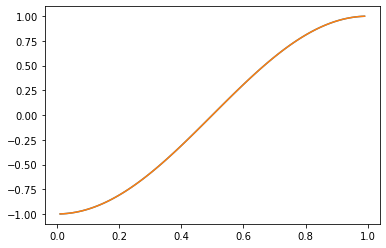

In [9]:
omega = np.pi
a = -1
b = 1

m = 100

x = np.linspace(0,1,m+2)
h = x[1] - x[0]

L = (1/h**2)*sp.diags([1,-2,1],[-1,0,1],shape=(m,m))

A = L + (omega**2) * sp.eye(m)

F = np.zeros(m)

F[0] = F[0] -a/(h**2)
F[-1] = F[1] -b/(h**2)

U = lin.spsolve(A,F)

# den eksakte løsningen
# vi skriver x[1:-1] fordi vi tar ikke med x_0 og x_m+1
U2 = - np.cos(omega*x[1:-1])

# plotter den numeriske løsningen i blå
plt.plot(x[1:-1],U)
# plotter den eksakte løsningen i oransje
plt.plot(x[1:-1],U2)

## 5. Andreordens ODE 2: Neumann randbetingelser

Hva skjer hvis vi tar $u'(0) = a, u'(1) = b$?.

Vi vet ikke lenger hva endpunktene $u_0$ og $u_{m+1}$ skal være. Løsningen er å legge dem til i $\vec{u}$. Vi trenger to ny ligninger. Den letteste løsning er å ta

$$
\frac{u_1 - u_0}{h} = u'(0) = a, \quad 
\frac{u_{m+1} - u_{m}}{h} = u'(1) = b,
$$


In [10]:
m = 4

x = np.linspace(0,1,m+2)
h = x[1] - x[0]

# matrisen er nå (m+2)x(m+2), siden vi må få med x_0 og x_m+1
L2 = (1/h**2)*sp.diags([1,-2,1],[-1,0,1],shape=(m+2,m+2))

# endrer datatypen til L2 slik at vi kan endre radene
L2 = sp.csr_matrix(L2)

# legger inn venstre randbetingelser i rad 1
L2[0,0] = -1/h
L2[0,1] = 1/h

# legger inn høyre randbetingelser i siste rad
L2[-1,-1] = 1/h
L2[-1,-2] = -1/h

print(L2.toarray())

[[ -5.   5.   0.   0.   0.   0.]
 [ 25. -50.  25.   0.   0.   0.]
 [  0.  25. -50.  25.   0.   0.]
 [  0.   0.  25. -50.  25.   0.]
 [  0.   0.   0.  25. -50.  25.]
 [  0.   0.   0.   0.  -5.   5.]]


### Eksempel: Løsning av andreordens ligningen

Vi har endt opp med et lineært system

$$
(L + \omega^2 I) u = 0.
$$

den løser vi under:

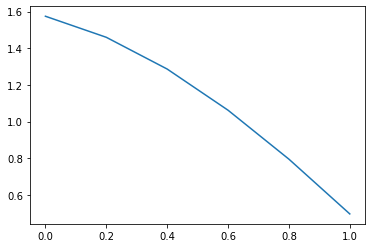

In [11]:
omega = 1

B = L2 + (omega**2) * sp.eye(m+2)

G = np.zeros(m+2)
# om vi hadde en funksjon f(x) på høyre side av ligningen ville vi satt G = f(x) istedet

# setter inn randbetingelsen i vektoren G
G[0] = G[0] - a
G[-1] = G[-1]- b

# løser systemet
V = lin.spsolve(B,G)

plt.plot(x,V)

### b) Poisson ligning ($\omega=0$)

Om $\omega=0$ har vi altså Poissonligningen

$$
u''(x) = 0, \quad u'(0)=a, u'(1)=b
$$

Den generelle løsning blir $u(x)=Ax + B$, slik at $u'(0)=u'(1)=A$. 

Vi har to situasjoner:

1. Hvis $a=b$ har vi uendelig mange løsninger $u(x)=Ax + B$, hvor vi kan velge $B$ som vi vil
2. Hvis $a\neq b$ har vi ingen løsninger.

Situasjonen gjenspeiles i den numeriske løsningen: Matrisen $L$ er ikke inverterbar, og ligningen

$$
L\vec{u} = \vec{F}
$$

har enten uendelig mange eller ingen løsninger, ut fra om $\vec{F}$ ligger i bilderommet til $L$, som er avhengig av verdiene til $a$ og $b$.

**Oppgave:**

Undersøk hva som skjer ved hjelp av koden under og det du husker fra lineær algebra i Matematikk 1.

In [18]:
# Har får vi ingen løsninger!

omega=0

a = 1
b = 1

B = L2 + (omega**2) * sp.eye(m+2)

G = np.zeros(m+2)

G[0] = -a
G[-1] = -b

V = lin.spsolve(B,G)

print(V)

[nan nan nan nan nan nan]


/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


In [22]:
# Beregner egenverdier/egenvektorer til B.

everdi, evektor = np.linalg.eig(B.toarray())

print(everdi)

# Vi ser at den femte egenverdi er (tilnærmet) null

# Nullrommet til matrisa er altså
V = evektor[:,4]

[-9.04892703e+01 -6.55892064e+01 -3.48073758e+01 -9.87970095e+00
  1.48930575e-14  7.65553388e-01]


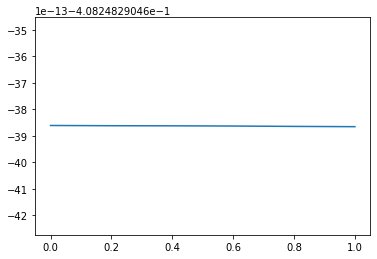

In [24]:
# Vi ser under at i dette tilfelle tilsvarer nullrommet en konstant funksjon f(x) = C

# Det tilsvarer forventningen at løsninger defineres kun opp til en konstant

plt.plot(x,V)

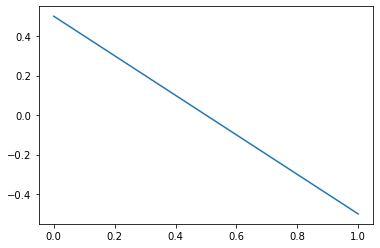

In [20]:
# Vi kan finne en minste kvadraters løsning under. Den beregner løsningen Lu = F med minst norm ||u|| om den finnes
# ellers beregner den u slik at normen ||Lu - F|| er minst mulig. 

V2, istop, itn, r1, r2 = lin.lsmr(B,G)[:5]

# minst kvadraters løsning
plt.plot(x,V2)

In [21]:
# gir størrelse på ||Lu-F||
print(r1)

1.0532786704972316e-13
